### **Project CO2**


In [27]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import ensemble
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Preprocessing
- Load the data
- Initial inspection of the data and renaming of the columns
- Repartition of the data per country 

<i> Load the data </i>

In [28]:
df_or=pd.read_csv('data_2022.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16712\383449354.py:1: DtypeWarning: Columns (2,3,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_or=pd.read_csv('data_2022.csv')


In [29]:
df=df_or.copy()

In [30]:
df.shape

(10734656, 40)

In [31]:
df_or.columns

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'ech', 'RLFI', 'Electric range (km)'],
      dtype='object')

<i> Remane the columns </i>

In [32]:
new_column_names = [
    "ID", "Country", "Vehicle family identification number", "Pool", "Manufacturer name (EU standard)",
    "Manufacturer name (OEM declaration)", "Manufacturer name (MS registry denomination)", "Type approval number",
    "Type", "Variant", "Version", "Make", "Commercial name", "Category of the vehicle type approved",
    "Category of the vehicle registered", "Total new registrations", "Mass in running order (kg)", "WLTP test mass",
    "Specific CO2 Emissions in g/km (NEDC)", "Specific CO2 Emissions in g/km (WLTP)", "Wheel base in mm",
    "Axle width steering axle in mm", "Axle width other axle in mm", "Fuel type", "Fuel mode", "Engine capacity in cm3",
    "Engine power in KW", "Electric energy consumption in Wh/km", "Innovative technology",
    "Emissions reduction through IT in g/km", "Emissions reduction through IT in g/km (WLTP)",
    "Deviation factor", "Verification factor", "Type of data", "Registration year", "Date of registration",
    "Fuel consumption", "Character corresponding to the provisions used for the type-approval", "Roadload (Matrix) family’s",
    "Electric range (km)"
]

# Assign the new column names to your DataFrame
df.columns = new_column_names

# Display the updated DataFrame
df.head(2)

,ID,Country,Vehicle family identification number,Pool,Manufacturer name (EU standard),Manufacturer name (OEM declaration),Manufacturer name (MS registry denomination),Type approval number,Type,Variant,...,Emissions reduction through IT in g/km (WLTP),Deviation factor,Verification factor,Type of data,Registration year,Date of registration,Fuel consumption,Character corresponding to the provisions used for the type-approval,Roadload (Matrix) family’s,Electric range (km)
0,121150000,FR,IP-JDA1MTGJT4B_000-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2001/116*0323*72,SR,DHE2,...,1.7,NaN,NaN,P,2023,2023-03-27,7.8,Euro 6 AP,NaN,NaN
1,121150001,FR,IP-0093-JT1-1,SUBARU-SUZUKI-TOYOTA,TOYOTA,TOYOTA MOTOR EUROPE NV SA,NaN,e6*2007/46*0322*05,XV7(EUM),AXVH71(E),...,0.8,NaN,NaN,P,2023,2023-07-21,5.5,Euro 6 AP,NaN,NaN


<i> Remove columns that are 50% empty </i>

In [57]:
# Number of columns before dropping
columns_before = len(df.columns)

# Calculate the threshold for NaN values (25% of the total rows)
threshold = len(df) * 0.5

# Drop columns with more than 25% NaN values
df = df.dropna(axis=1, thresh=threshold)

# Number of columns after dropping
columns_after = len(df.columns)

columns_before, columns_after

(30, 28)

<i> Complete basic statistics </i>

In [58]:
df.describe()

,ID,Total new registrations,Mass in running order (kg),WLTP test mass,Specific CO2 Emissions in g/km (WLTP),Engine capacity in cm3,Engine power in KW,Emissions reduction through IT in g/km (WLTP),Registration year,Fuel consumption
count,1.073466e+07,10734656.0,1.073423e+07,1.021110e+07,1.071376e+07,9.064282e+06,1.069928e+07,5.767908e+06,10734656.0,7.551492e+06
mean,1.259870e+08,1.0,1.546215e+03,1.656073e+03,1.066655e+02,1.545012e+03,1.153268e+02,1.524171e+00,2023.0,5.409758e+00
std,8.058074e+06,0.0,3.610450e+02,3.741814e+02,5.956828e+01,5.281492e+02,6.258912e+01,5.029387e-01,0.0,1.785632e+00
min,9.024041e+07,1.0,4.950000e+02,6.150000e+02,0.000000e+00,6.580000e+02,8.000000e+00,5.000000e-01,2023.0,1.000000e-01
25%,1.221876e+08,1.0,1.270000e+03,1.376000e+03,1.010000e+02,1.197000e+03,7.400000e+01,1.100000e+00,2023.0,4.900000e+00
50%,1.288935e+08,1.0,1.480000e+03,1.585000e+03,1.230000e+02,1.497000e+03,1.000000e+02,1.700000e+00,2023.0,5.500000e+00
75%,1.318817e+08,1.0,1.765000e+03,1.881000e+03,1.390000e+02,1.968000e+03,1.320000e+02,1.960000e+00,2023.0,6.100000e+00
max,1.347967e+08,1.0,4.953000e+03,4.574000e+03,5.430000e+02,7.997000e+03,1.177000e+03,7.000000e+00,2023.0,2.900000e+01


<i> Modalities of categorical variables </i>

In [59]:
numerical_df=df.select_dtypes(include=['number'])
print(numerical_df.columns)
# Select categorical columns (including object and category types)
categorical_df = df.select_dtypes(include=['object', 'category'])
print(categorical_df.columns)

Index(['ID', 'Total new registrations', 'Mass in running order (kg)',
       'WLTP test mass', 'Specific CO2 Emissions in g/km (WLTP)',
       'Engine capacity in cm3', 'Engine power in KW',
       'Emissions reduction through IT in g/km (WLTP)', 'Registration year',
       'Fuel consumption'],
      dtype='object')
Index(['Country', 'Vehicle family identification number', 'Pool',
       'Manufacturer name (EU standard)',
       'Manufacturer name (OEM declaration)', 'Type approval number', 'Type',
       'Variant', 'Version', 'Make', 'Commercial name',
       'Category of the vehicle type approved',
       'Category of the vehicle registered', 'Fuel type', 'Fuel mode',
       'Innovative technology', 'Type of data', 'Date of registration'],
      dtype='object')


In [60]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("\n")

Column: Country
['FR' 'ES' 'IT' 'DE' 'PL' 'BG' 'LU' 'PT' 'DK' 'MT' 'SK' 'IE' 'AT' 'RO'
 'CZ' 'SI' 'HU' 'SE' 'NL' 'NO' 'HR' 'FI' 'EE' 'LV' 'IS' 'LT' 'GR' 'BE'
 'CY']


Column: Vehicle family identification number
['IP-JDA1MTGJT4B_000-VF1-1' 'IP-0093-JT1-1' 'IP-CX72_2020_00002-WF0-1' ...
 'IP-0000372-WBA-1' '1P-23MB58PA6d_01-SC6-1' 'IP-0000925_UWBA']


Column: Pool
['RENAULT-NISSAN-MITSUBISHI' 'SUBARU-SUZUKI-TOYOTA' 'FORD' 'STELLANTIS'
 'KIA' 'VOLKSWAGEN' 'MERCEDES-BENZ AG' nan 'BMW' 'HYUNDAI MOTOR EUROPE'
 'MAZDA' 'KG MOBILITY GREAT WALL MOTOR']


Column: Manufacturer name (EU standard)
['RENAULT' 'TOYOTA' 'FORD WERKE GMBH' 'STELLANTIS AUTO' 'KIA SLOVAKIA'
 'VOLKSWAGEN' 'MERCEDES-BENZ AG' 'NISSAN AUTOMOTIVE EUROPE' 'TESLA'
 'AUTOMOBILES PEUGEOT' 'SUZUKI MOTOR CORPORATION' 'KIA' 'BMW AG'
 'AUTOMOBILES CITROEN' 'TOYOTA MOTOR CORPORATION' 'DACIA'
 'STELLANTIS EUROPE' 'AUDI AG' 'SEAT' 'OPEL AUTOMOBILE' 'PORSCHE'
 'HYUNDAI' 'SKODA' 'VOLVO' 'HYUNDAI CZECH' 'MAZDA EUROPE'
 'SAIC MOTOR CORPORAT

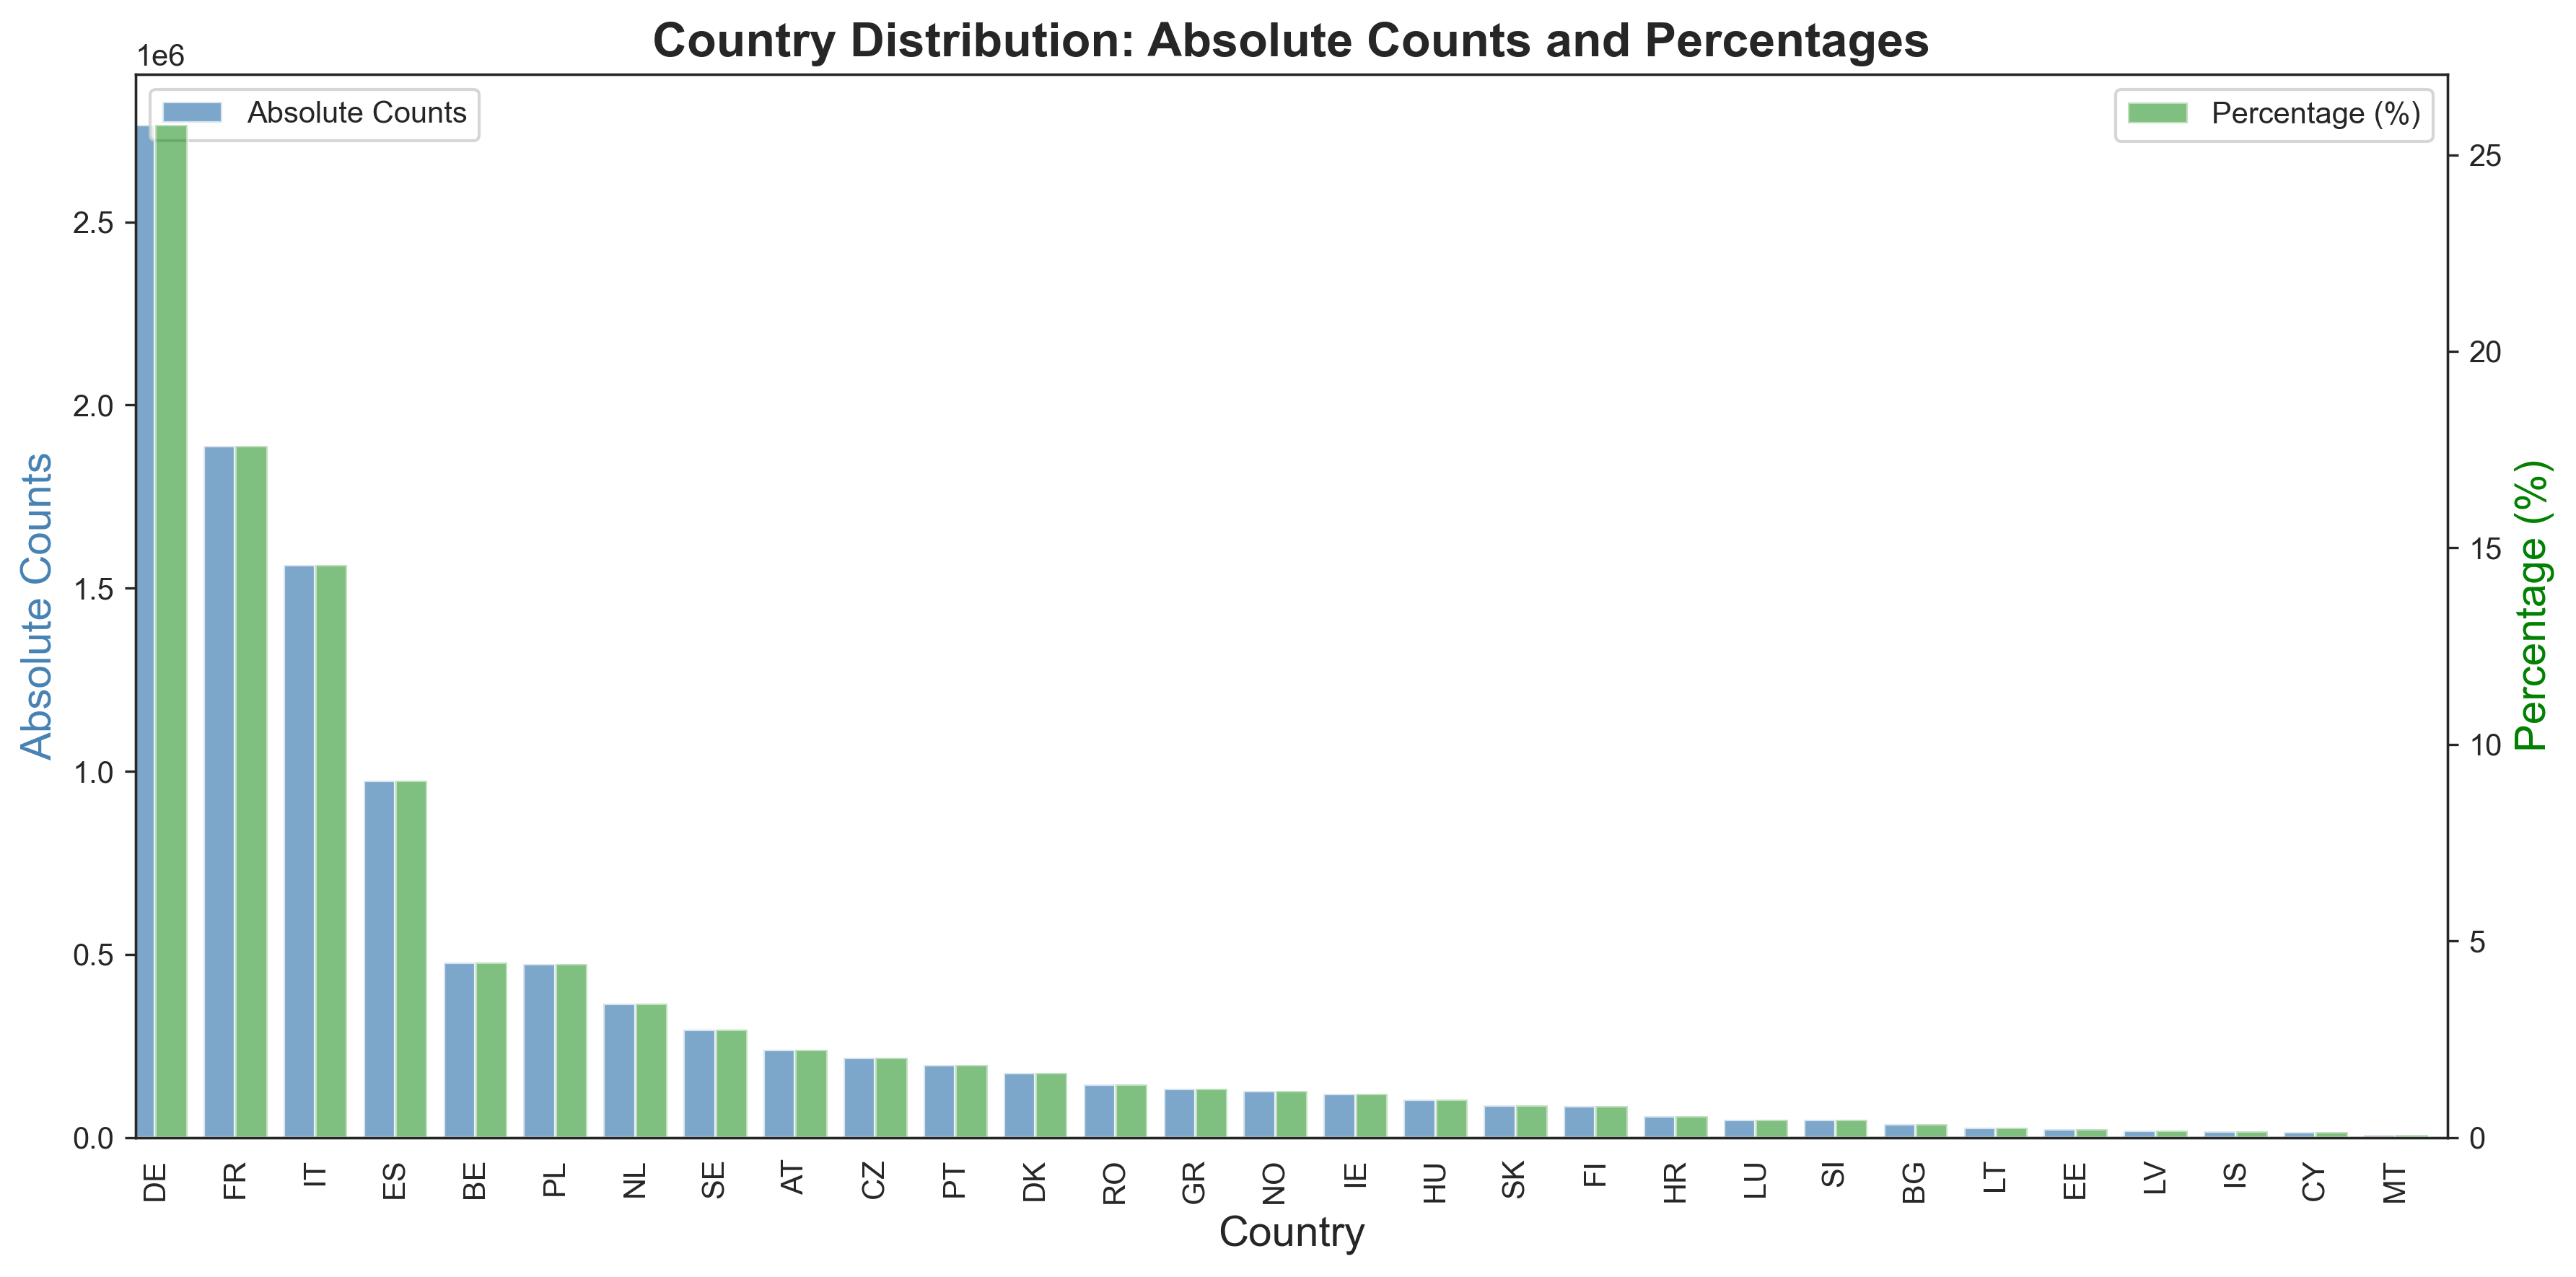

In [61]:
# Set the Seaborn style to 'white' for a clean background without gridlines
sns.set_style("white")

# Calculate the absolute counts and percentages
country_counts = df['Country'].value_counts()
country_percentages = df['Country'].value_counts(normalize=True) * 100

# Create the figure and axis objects with higher DPI for better quality
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Plot the absolute counts on the left y-axis
country_counts.plot(kind='bar', ax=ax1, color='steelblue', alpha=0.7, position=1, width=0.4)

# Set the labels and title for the left y-axis with custom fonts
ax1.set_ylabel('Absolute Counts', color='steelblue', fontsize=14)
ax1.set_xlabel('Country', fontsize=14)
ax1.set_title('Country Distribution: Absolute Counts and Percentages', fontsize=16, fontweight='bold')

# Create a second y-axis for the percentages
ax2 = ax1.twinx()

# Plot the percentages on the right y-axis
country_percentages.plot(kind='bar', ax=ax2, color='green', alpha=0.5, position=0, width=0.4)

# Set the labels for the right y-axis with custom fonts
ax2.set_ylabel('Percentage (%)', color='green', fontsize=14)

# Rotate x labels for better readability and set custom fonts
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend
ax1.legend(['Absolute Counts'], loc='upper left')
ax2.legend(['Percentage (%)'], loc='upper right')

# Tighten layout for better spacing
plt.tight_layout()

# Save the plot as a high-resolution PNG image
plt.savefig('country_distribution.png', format='png', dpi=300)

# Display the plot
plt.show()

In [62]:
country_percentages = df['Country'].value_counts(normalize=True) * 100
print(country_percentages[:5])

Country
DE    25.759000
FR    17.602790
IT    14.571347
ES     9.075568
BE     4.445890
Name: proportion, dtype: float64


### Features engineering
- Select the features that really matter based on bibliography (Zubair et al. & Al-Nefaie et al.)

In [37]:
df.columns

Index(['ID', 'Country', 'Vehicle family identification number', 'Pool',
       'Manufacturer name (EU standard)',
       'Manufacturer name (OEM declaration)', 'Type approval number', 'Type',
       'Variant', 'Version', 'Make', 'Commercial name',
       'Category of the vehicle type approved',
       'Category of the vehicle registered', 'Total new registrations',
       'Mass in running order (kg)', 'WLTP test mass',
       'Specific CO2 Emissions in g/km (WLTP)', 'Fuel type', 'Fuel mode',
       'Engine capacity in cm3', 'Engine power in KW', 'Innovative technology',
       'Emissions reduction through IT in g/km (WLTP)', 'Type of data',
       'Registration year', 'Date of registration', 'Fuel consumption',
       'Character corresponding to the provisions used for the type-approval',
       'Roadload (Matrix) family’s'],
      dtype='object')

In [40]:
# The selection of important features was done using using two articles we had access to 
columns_to_use=['Country','Pool','Type','Commercial name', 'Mass in running order (kg)', 'WLTP test mass',
              'Specific CO2 Emissions in g/km (WLTP)', 'Fuel type', 'Fuel mode',
               'Engine capacity in cm3', 
               'Emissions reduction through IT in g/km (WLTP)',
               'Fuel consumption'
               ]


df_selected = df[columns_to_use]
df_selected.head()


,Country,Pool,Type,Commercial name,Mass in running order (kg),WLTP test mass,Specific CO2 Emissions in g/km (WLTP),Fuel type,Fuel mode,Engine capacity in cm3,Emissions reduction through IT in g/km (WLTP),Fuel consumption
0,FR,RENAULT-NISSAN-MITSUBISHI,SR,DUSTER,1337.0,1446.0,126.0,lpg,B,999.0,1.70,7.8
1,FR,SUBARU-SUZUKI-TOYOTA,XV7(EUM),TOYOTA CAMRY,1670.0,1782.0,125.0,petrol,H,2487.0,0.80,5.5
2,FR,FORD,LSK,MUSTANG MACH-E,2044.0,2187.0,0.0,electric,E,NaN,NaN,NaN
3,FR,STELLANTIS,N,C5 X,1493.0,1576.0,135.0,petrol,M,1199.0,2.00,6.0
4,FR,KIA,NQ5E,SPORTAGE,1649.0,1814.0,131.0,petrol,H,1598.0,0.59,5.8


In [47]:
columns_to_use = ['Country', 'Pool', 'Manufacturer name (EU standard)', 'Type', 'Commercial name', 
                  'Mass in running order (kg)', 'WLTP test mass', 'Specific CO2 Emissions in g/km (WLTP)', 
                  'Fuel type', 'Fuel mode', 'Engine capacity in cm3', 
                  'Emissions reduction through IT in g/km (WLTP)', 'Fuel consumption']

df_selected = df[columns_to_use]

# Get the data types of the selected columns
column_types = df_selected.dtypes

# Display the data types
print(column_types)

Country                                           object
Pool                                              object
Manufacturer name (EU standard)                   object
Type                                              object
Commercial name                                   object
Mass in running order (kg)                       float64
WLTP test mass                                   float64
Specific CO2 Emissions in g/km (WLTP)            float64
Fuel type                                         object
Fuel mode                                         object
Engine capacity in cm3                           float64
Emissions reduction through IT in g/km (WLTP)    float64
Fuel consumption                                 float64
dtype: object


In [48]:
df_selected.isna().mean()*100

Country                                           0.000000
Pool                                              8.916187
Manufacturer name (EU standard)                   0.000000
Type                                              0.058474
Commercial name                                   0.003605
Mass in running order (kg)                        0.003959
WLTP test mass                                    4.877259
Specific CO2 Emissions in g/km (WLTP)             0.194613
Fuel type                                         0.000000
Fuel mode                                         0.000009
Engine capacity in cm3                           15.560573
Emissions reduction through IT in g/km (WLTP)    46.268348
Fuel consumption                                 29.653153
dtype: float64

In [49]:
columns=['Fuel consumption','Specific CO2 Emissions in g/km (WLTP)','WLTP test mass','Pool','Mass in running order (kg)','Commercial name', 'Engine capacity in cm3','Type']
df_selected= df_selected.dropna(subset=columns)

In [50]:
df_selected['Emissions reduction through IT in g/km (WLTP)'].fillna(0,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16712\1471528708.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['Emissions reduction through IT in g/km (WLTP)'].fillna(0,inplace=True)


In [51]:
df_selected.isna().mean()*100
print(len(df_selected))

7063310


In [52]:
# Initialize an empty dictionary to store the ranges
column_ranges = {}

# Iterate over each column and calculate the range
for column in df_selected.columns:
    if pd.api.types.is_numeric_dtype(df_selected[column]):
        # For numerical columns, calculate the range
        column_ranges[column] = {
            'min': df_selected[column].min(),
            'max': df_selected[column].max()
        }
    else:
        # For non-numerical columns, show the unique values as their "range"
        column_ranges[column] = {
            'unique_values': df_selected[column].unique()
        }

# Convert the dictionary to a DataFrame for better readability
column_ranges_df = pd.DataFrame(column_ranges).T

# Display the ranges
print(column_ranges_df)

                                                                                   unique_values  \
Country                                        [FR, ES, IT, DE, PL, BG, LU, PT, MT, SK, IE, A...   
Pool                                           [RENAULT-NISSAN-MITSUBISHI, SUBARU-SUZUKI-TOYO...   
Manufacturer name (EU standard)                [RENAULT, TOYOTA, STELLANTIS AUTO, KIA SLOVAKI...   
Type                                           [SR, XV7(EUM), N, NQ5E, AX1T(EUM), C1, F2B, F1...   
Commercial name                                [DUSTER, TOYOTA CAMRY, C5 X, SPORTAGE, TOYOTA ...   
Mass in running order (kg)                                                                   NaN   
WLTP test mass                                                                               NaN   
Specific CO2 Emissions in g/km (WLTP)                                                        NaN   
Fuel type                                      [lpg, petrol, diesel, e85, petrol/electric, di...   


In [63]:
del df
del df_or

### Data visualization 
- Box plot to identify the distribution of the data
- Plot of the correlation machine 

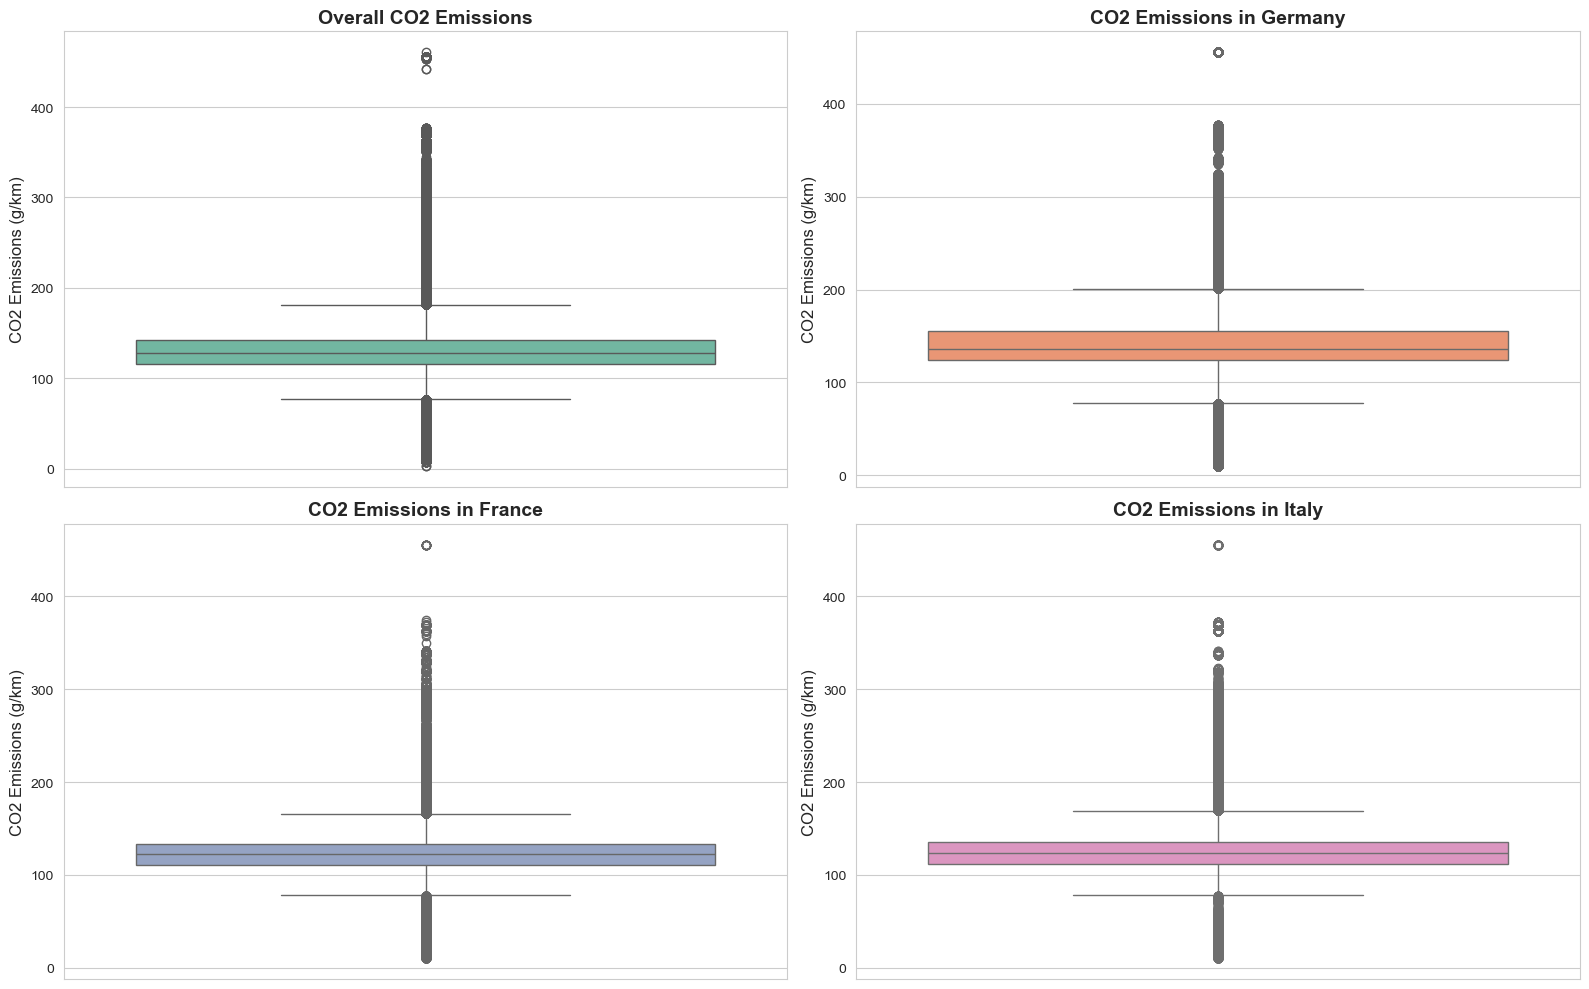

In [64]:
# Set the Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Define a color palette
palette = sns.color_palette("Set2")

# Define the figure size and layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Helper function to plot boxplots with enhancements
def plot_boxplot(data, title, ax, color):
    sns.boxplot(y='Specific CO2 Emissions in g/km (WLTP)', data=data, ax=ax, color=color)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('CO2 Emissions (g/km)', fontsize=12)
    ax.set_xlabel('')  # Remove the x-axis label as it's not needed

# Plot for the overall dataset
plot_boxplot(df_selected, 'Overall CO2 Emissions', axes[0, 0], palette[0])

# Plot for Germany
plot_boxplot(df_selected[df_selected['Country'] == 'DE'], 'CO2 Emissions in Germany', axes[0, 1], palette[1])

# Plot for France
plot_boxplot(df_selected[df_selected['Country'] == 'FR'], 'CO2 Emissions in France', axes[1, 0], palette[2])

# Plot for Italy
plot_boxplot(df_selected[df_selected['Country'] == 'IT'], 'CO2 Emissions in Italy', axes[1, 1], palette[3])

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as a high-resolution PNG image for inclusion in a report
plt.savefig('co2_emissions_report.png', format='png', dpi=300)

# Show the plots
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16712\3623217525.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pool'] = pd.Categorical(data['Pool'], categories=ordered_pools_sorted, ordered=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16712\3623217525.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pool'] = pd.Categorical(data['Pool'], categories=ordered_pools_sorted, ordered=True)


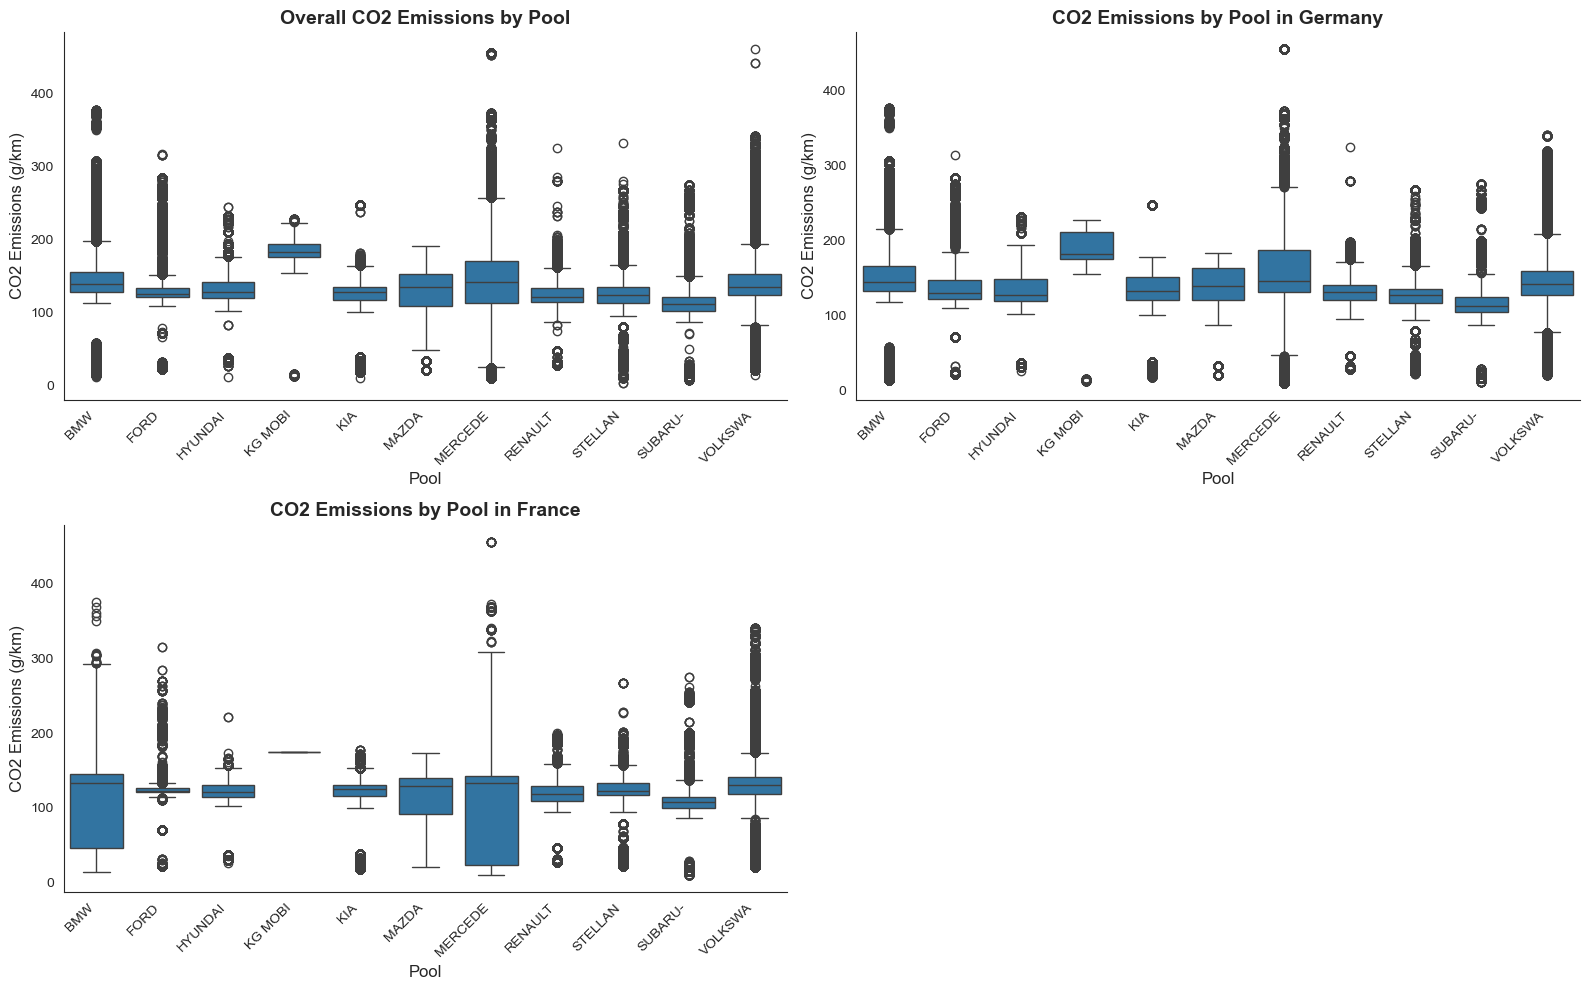

In [65]:
# Set the Seaborn style to 'white' for a clean background without gridlines
sns.set_style("white")

# Function to trim labels to a maximum of 7 characters
def trim_labels(labels):
    return [label[:7] for label in labels]

# Determine the unique pools and their trimmed versions in the desired order
ordered_pools = df_selected['Pool'].unique()
ordered_pools_sorted = sorted(ordered_pools, key=lambda x: x[:5])  # Sort by trimmed label
ordered_pools_trimmed = trim_labels(ordered_pools_sorted)

# Define the figure size and layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Helper function to plot boxplots only if data exists
def plot_if_data_exists(data, title, ax):
    if not data.empty:
        # Reorder the pools in the same order for all plots
        data['Pool'] = pd.Categorical(data['Pool'], categories=ordered_pools_sorted, ordered=True)
        sns.boxplot(x='Pool', y='Specific CO2 Emissions in g/km (WLTP)', data=data, ax=ax)
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_xlabel('Pool', fontsize=12)
        ax.set_ylabel('CO2 Emissions (g/km)', fontsize=12)
        ax.set_xticks(range(len(ordered_pools_trimmed)))
        ax.set_xticklabels(ordered_pools_trimmed, rotation=45, ha='right', fontsize=10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

# Overall data box plot
plot_if_data_exists(df_selected, 'Overall CO2 Emissions by Pool', axes[0, 0])

# Germany box plot
plot_if_data_exists(df_selected[df_selected['Country'] == 'DE'], 'CO2 Emissions by Pool in Germany', axes[0, 1])

# France box plot
plot_if_data_exists(df_selected[df_selected['Country'] == 'FR'], 'CO2 Emissions by Pool in France', axes[1, 0])

# Remove the last subplot (which was for Italy)
fig.delaxes(axes[1, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as a high-resolution PNG image for inclusion in a report
plt.savefig('co2_emissions_report_no_grid_no_italy.png', format='png', dpi=300)

# Show the plots
plt.show()

In [66]:
# Create a function to generate summary statistics for a specific subset of the data
def generate_statistics(data, country_name):
    stats = data['Specific CO2 Emissions in g/km (WLTP)'].describe().to_frame().T
    stats['Country'] = country_name
    return stats

# Get statistics for the overall dataset
overall_stats = generate_statistics(df_selected, 'Overall')

# Get statistics for Germany
germany_stats = generate_statistics(df_selected[df_selected['Country'] == 'DE'], 'Germany')

# Get statistics for France
france_stats = generate_statistics(df_selected[df_selected['Country'] == 'FR'], 'France')

# Get statistics for Italy
italy_stats = generate_statistics(df_selected[df_selected['Country'] == 'IT'], 'Italy')

# Concatenate all the statistics into one DataFrame
all_stats = pd.concat([overall_stats, germany_stats, france_stats, italy_stats])

# Reset index for better display
all_stats.reset_index(drop=True, inplace=True)

# Display the statistics table
print(all_stats)

       count        mean        std   min    25%    50%    75%    max  Country
0  7063310.0  126.761808  39.731316   3.0  116.0  128.0  142.0  461.0  Overall
1  2140118.0  138.999046  45.440096  10.0  124.0  136.0  155.0  456.0  Germany
2  1543750.0  116.502216  32.389164  10.0  111.0  122.0  133.0  456.0   France
3  1360690.0  125.401174  25.366009  10.0  112.0  124.0  135.0  456.0    Italy


In [68]:
print('The stastics of data from Italy is close to the overall data', 'We can just keep 3 data sets: All,Germany, France, Italy')

The stastics of data from Italy is close to the overall data We can just keep 3 data sets: All,Germany, France, Italy


- Correlation between several variables 

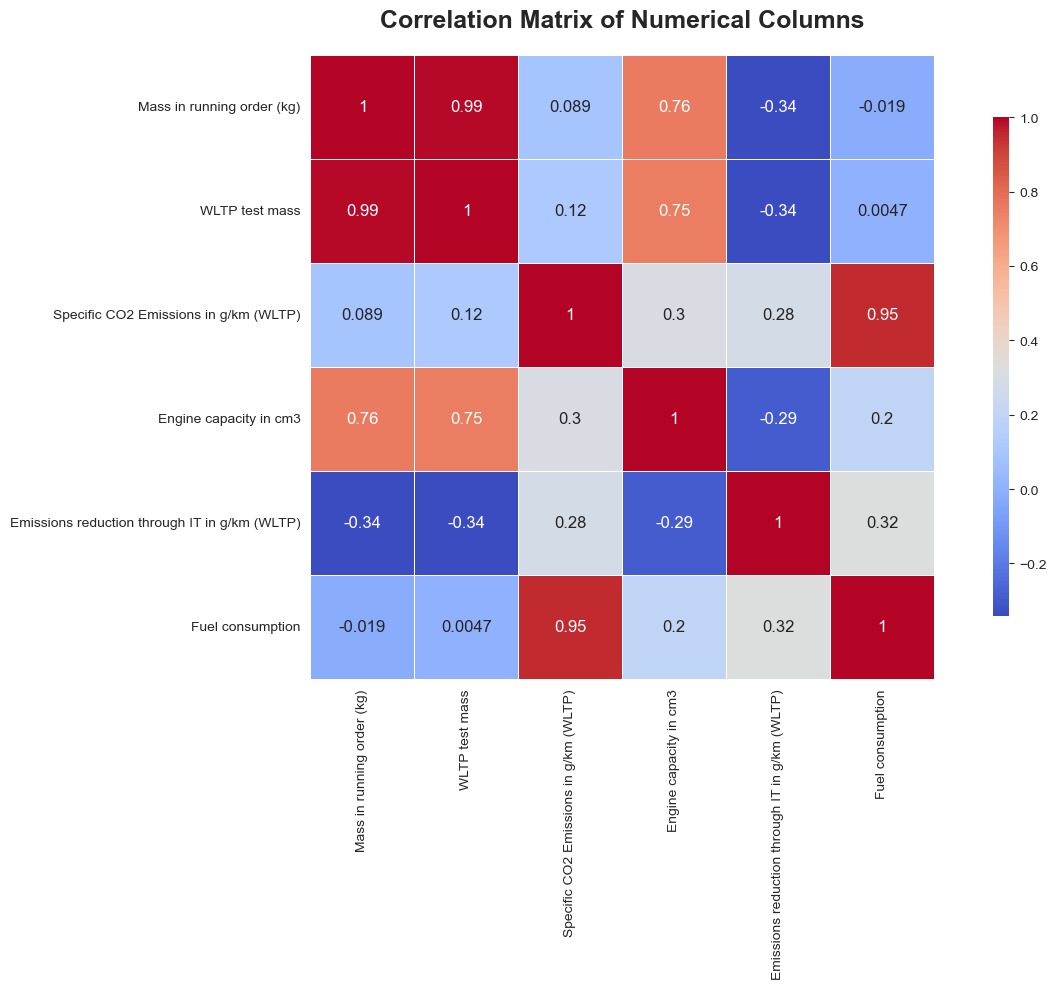

In [69]:
# Select only numerical columns
numerical_df = df_selected.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap with enhanced aesthetics
plt.figure(figsize=(14, 10))  # Larger figure size for better readability
sns.heatmap(correlation_matrix, 
            annot=True,             # Show the correlation values
            cmap='coolwarm',        # Color map
            linewidths=0.5,         # Add lines between squares
            annot_kws={"size": 12}, # Adjust the font size of annotations
            cbar_kws={"shrink": 0.8, "aspect": 30}, # Adjust the colorbar
            square=True)            # Keep the squares square-shaped

# Title with a bigger font size and bold
plt.title('Correlation Matrix of Numerical Columns', fontsize=18, fontweight='bold', pad=20)

# Adjust layout to make sure everything fits without overlapping
plt.tight_layout()

# Save the plot as a high-resolution PNG image
plt.savefig('correlation_matrix_report.png', format='png', dpi=300)

# Show the plot
plt.show()

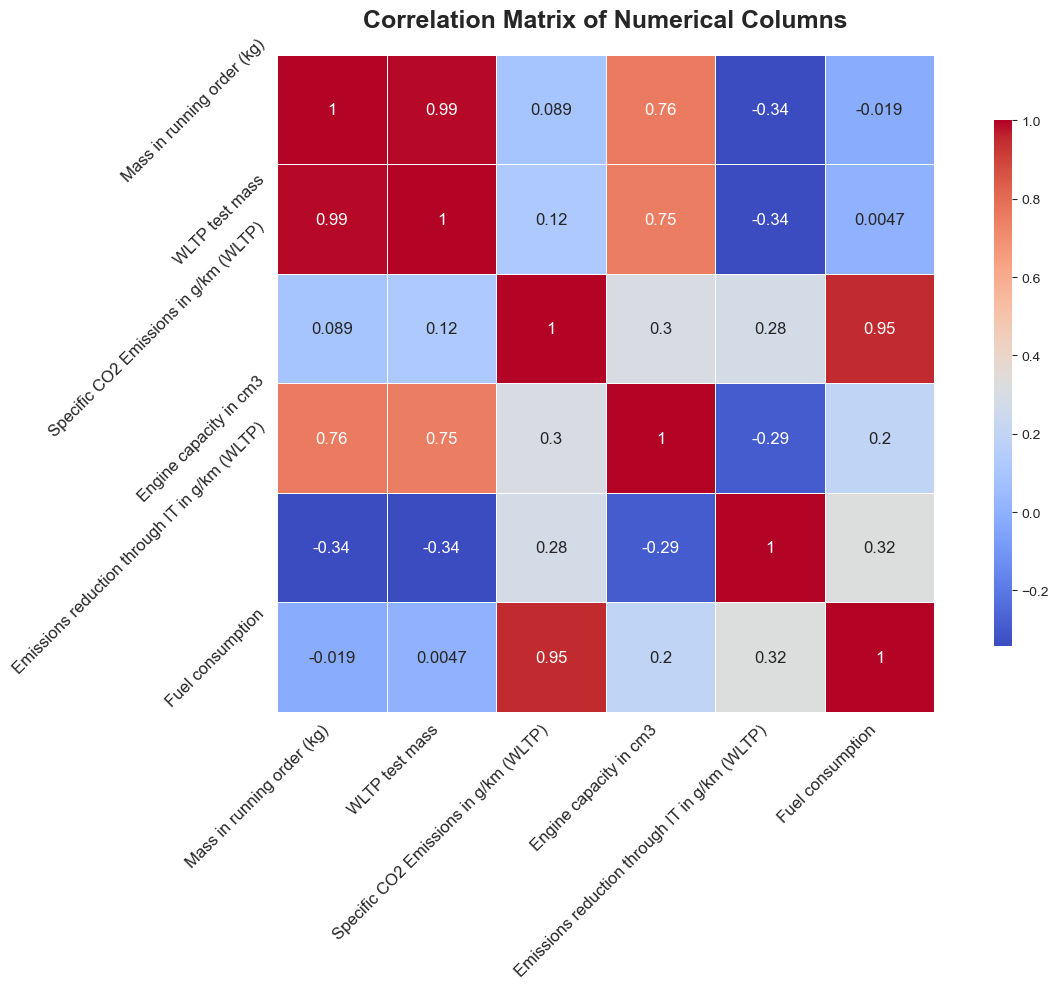

In [55]:
# Select only numerical columns
numerical_df = df_selected.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap with enhanced aesthetics
plt.figure(figsize=(14, 10))  # Larger figure size for better readability
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True,             # Show the correlation values
                      cmap='coolwarm',        # Color map
                      linewidths=0.5,         # Add lines between squares
                      annot_kws={"size": 12}, # Adjust the font size of annotations
                      cbar_kws={"shrink": 0.8, "aspect": 30}, # Adjust the colorbar
                      square=True)            # Keep the squares square-shaped

# Rotate the x and y axis labels to 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=45, fontsize=12)

# Title with a bigger font size and bold
plt.title('Correlation Matrix of Numerical Columns', fontsize=18, fontweight='bold', pad=20)

# Adjust layout to make sure everything fits without overlapping
plt.tight_layout()

# Save the plot as a high-resolution PNG image
plt.savefig('correlation_matrix_report.png', format='png', dpi=300)

# Show the plot
plt.show()